In [6]:
from datetime import datetime
import numpy as np

ar = np.arange(5)
indiciesWorking = np.argwhere(ar==3)
print(indiciesWorking)

[[3]]


In [19]:
import pandas as pd
df = pd.read_excel(r'C:\Users\basti\PythonScripts\Investment_analysis\data\MSCIWORLD.xlsx', sheet_name='IE00BJ0KDQ92', skiprows=13)

# Display the dataframe
# print(df)

# # Access specific columns
print(df.columns)
dates = df['Date'].values
print(type(dates))
#Iterate through rows
# for index, row in df.iterrows():
#     print(row['Date'])

Index(['Date', 'NAV', 'Index Level'], dtype='object')
<class 'numpy.ndarray'>


In [27]:
a = {'a':1,'b':2,'c':3}
for i,j in a.items():
    print(i,j)
print(sum(a.values()))
a = [2,3,4]
a[2] = 3
print(a)

a 1
b 2
c 3
6
[2, 3, 3]


In [2]:
from data.file_loading import DATE_FORMAT
from investmentclasses import Investment
from dataclasses import dataclass
from datetime import datetime, timedelta

def generate_dates(start_date:str, end_date:str):
    start_date = datetime.strptime(start_date, DATE_FORMAT)
    end_date = datetime.strptime(end_date, DATE_FORMAT)
    current_date = start_date
    while current_date <= end_date:
        yield current_date
        current_date += timedelta(days=1)

st= '13.06.2024'
en = '16.08.2024'
for date in generate_dates(st, en):
    print(date.day)

13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [4]:
round(156.489)

156

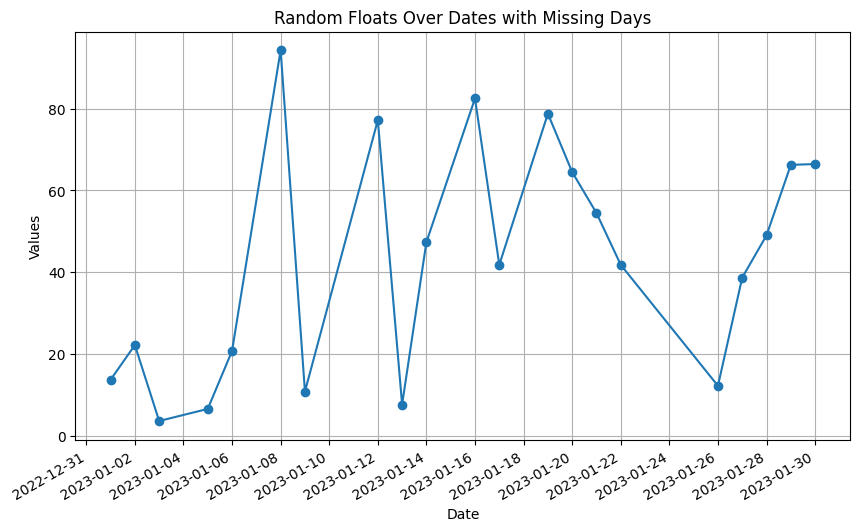

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Step 1: Define the date range and missing days
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 30)
missing_days = {4, 7, 10, 11, 15, 18, 23, 24, 25}

# Create the list of dates with the missing days removed
dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1) if (i + 1) not in missing_days]

# Step 2: Generate the corresponding random float values
floats = np.random.rand(len(dates)) * 100  # random floats between 0 and 100

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(dates, floats, marker='o', linestyle='-')

# Formatting the date on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Random Floats Over Dates with Missing Days')
plt.grid(True)
plt.gcf().autofmt_xdate()  # Rotate date labels
plt.show()


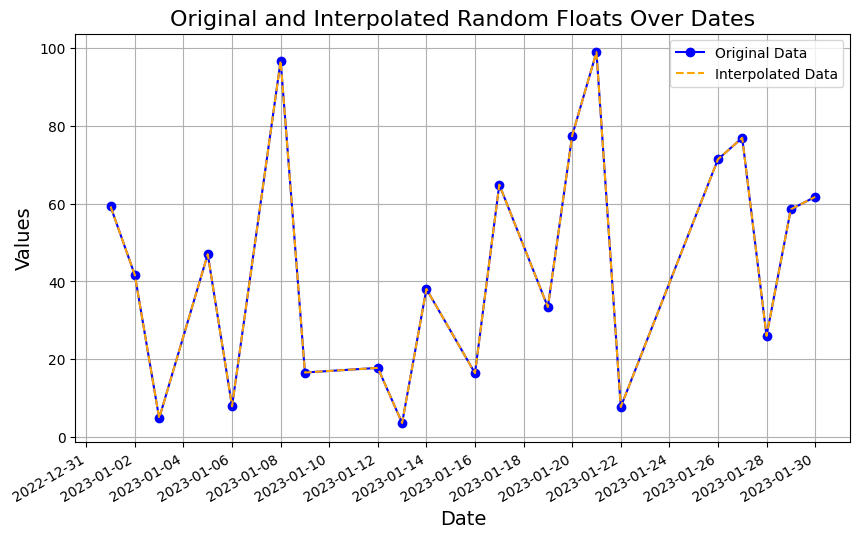

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.interpolate import interp1d
import matplotlib.dates as mdates

# Define the date range and missing days
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 30)
missing_days = {4, 7, 10, 11, 15, 18, 23, 24, 25}

# Create the list of dates with the missing days removed
dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1) if (i + 1) not in missing_days]

# Generate the corresponding random float values
floats = np.random.rand(len(dates)) * 100  # random floats between 0 and 100

# Create the full list of dates
full_dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Convert datetime to float days for interpolation
date_nums = mdates.date2num(dates)
full_date_nums = mdates.date2num(full_dates)

# Perform interpolation
interp_func = interp1d(date_nums, floats, kind='linear', fill_value="extrapolate")
interpolated_floats = interp_func(full_date_nums)

# Plot the data
plt.figure(figsize=(10, 6))

# Original data
plt.plot(dates, floats, marker='o', linestyle=None, color='blue', label='Original Data')

# Interpolated data
plt.plot(full_dates, interpolated_floats, linestyle='--', color='orange', label='Interpolated Data')

# Formatting the date on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.xlabel('Date', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Original and Interpolated Random Floats Over Dates', fontsize=16)
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()

plt.show()
